<a href="https://colab.research.google.com/github/keshavkishor/Sales-Analysis/blob/main/Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MOUNTING THE DRIVE


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Sales Analysis Project

/content/gdrive/MyDrive/Sales Analysis Project


IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import os


MERGING 12 MONTHS DATA TO A SINGLE CSV FILE

In [ ]:
## df = pd.read_csv("/content/gdrive/MyDrive/Sales Analysis Project/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("/content/gdrive/MyDrive/Sales Analysis Project/SalesAnalysis/Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:

  df = pd.read_csv("/content/gdrive/MyDrive/Sales Analysis Project/SalesAnalysis/Sales_Data/"+ file)
  all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("All_data.csv", index = False)    



READ IN UPDATED DATAFRAME 

In [ ]:
all_data = pd.read_csv("/content/gdrive/MyDrive/Sales Analysis Project/All_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


DROP ROWS OF NaN(so that we can convert string month to int type)


In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data = all_data.dropna(how = 'all')

DROP ROWS WHOSE ORDER DATE COLUMN IS HAVING "Or" INSTEAD OF DATE

In [ ]:
## temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
## temp_df.head()
## INSTEAD OF DROPING THE UNWANTED COLUMN, WE CAN ASSIGN THE WANTED COLUMN TO THE DATA FRAME
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


CHANGING TYPE OF QUANTITY ORDERED AND PRICE COLUMN TO INT AND FLOAT RESPECTIVELY

In [ ]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int) #to int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #another way of type casting 

ADDING MONTH COLUMN

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
## TYPE CASTING STRING VALUE TO INT VALUE
all_data['Month'] = all_data['Month'].astype(int)  
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3


ADD A SALES COLUMN

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99


ADD A CITY COLUMN

In [ ]:
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')## we can also use f string for appending
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX)
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco (CA)


BEST MONTH FOR SALES

In [ ]:
results = all_data.groupby('Month').sum()

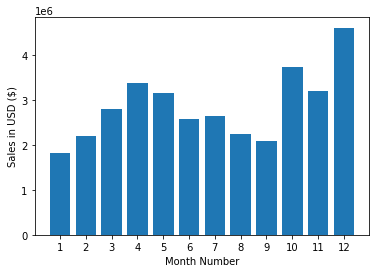

In [ ]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()


BEST CITY FOR SALES

In [ ]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


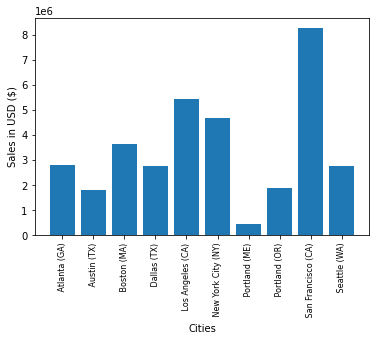

In [ ]:
import matplotlib.pyplot as plt
##cities = all_data['City'].unique() ## as due to this our x values are getting arranged in different order as compared to y values i.e sales
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size= 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show()

What time should we display advertisements to maximize likelihood of customers buying product ?


In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX),20,59
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX),20,59
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX),20,59
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco (CA),5,39
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco (CA),0,1


<function matplotlib.pyplot.show>

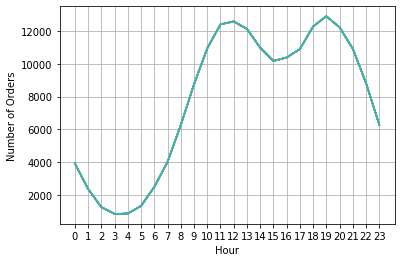

In [ ]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show

##recommendation is around 11am or 7pm

What products are most often sold together?

In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
0,162009,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,"iPhone,Lightning Charging Cable"
60,162066,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,"Vareebadd Phone,USB-C Charging Cable"
78,162082,"Vareebadd Phone,Wired Headphones"


In [ ]:
## wrong cuz suppose if in our grouped column one row value comes like 20in Monitor,27in FHD Monitor and in some other
## row it is goven as 27in FHD Monitor,20in FHD Monitor then it will comsider both of them as different values instead
##it should cosider them as same values but arran=ged in different orders.
new_df = df
new_df.groupby(['Grouped']).count() 

In [ ]:
from itertools import combinations
from collections import Counter
count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
  print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


What product sold the most?

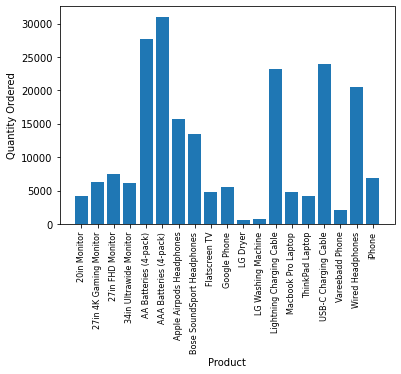

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered'] 

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

Overlaying a second Y-Axis

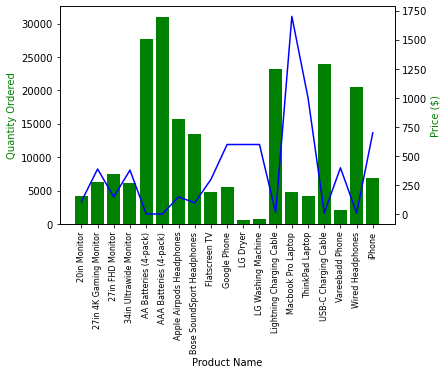

In [ ]:
prices  = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='g')
ax1.set_xticklabels(products, rotation = 'vertical', size=8)

plt.show()